In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv("C:/Users/dheni/Downloads/Appointments.csv")
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [3]:
# Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# Convert to int first to remove decimals, then back to string for clean storage
df['PatientId'] = df['PatientId'].astype(float).astype('Int64').astype(str)

In [5]:
# Convert to datetime first
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [6]:
# Data Cleaning
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'].dt.strftime('%d-%m-%y'))
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'].dt.strftime('%d-%m-%y'))

C:\Users\dheni\AppData\Local\Temp\ipykernel_14712\3516329748.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'].dt.strftime('%d-%m-%y'))
C:\Users\dheni\AppData\Local\Temp\ipykernel_14712\3516329748.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'].dt.strftime('%d-%m-%y'))


In [7]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,29872500000000,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558998000000000,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262960000000,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951000000,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841190000000,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572130000000,5651768,F,2016-03-05,2016-07-06,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596270000000,5650093,F,2016-03-05,2016-07-06,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576600000000,5630692,F,2016-04-27,2016-07-06,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134900000000,5630323,F,2016-04-27,2016-07-06,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [8]:
# Fix inconsistent dates (Scheduled after Appointment)
df = df[df['ScheduledDay'] <= df['AppointmentDay']]

In [9]:
df.shape

(87844, 14)

In [10]:
# Remove negative ages
df = df[df['Age'] >= 0]

In [11]:
df.shape

(87843, 14)

In [12]:
# Convert target variable to binary
df['No-show'] = df['No-show'].map({'Yes': 1, 'No': 0})

In [13]:
# Feature Engineering
df['DaysBetween'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df['Weekday'] = df['AppointmentDay'].dt.dayofweek  # Monday = 0, Sunday = 6

In [14]:
df['Gender'] = df['Gender'].map({'M':'Male', 'F':'Female'})

In [15]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,DaysBetween,Weekday
0,29872500000000,5642903,Female,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,4
1,558998000000000,5642503,Male,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,4
2,4262960000000,5642549,Female,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,4
3,867951000000,5642828,Female,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,4
4,8841190000000,5642494,Female,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572130000000,5651768,Female,2016-03-05,2016-07-06,56,MARIA ORTIZ,0,0,0,0,0,1,0,123,2
110523,3596270000000,5650093,Female,2016-03-05,2016-07-06,51,MARIA ORTIZ,0,0,0,0,0,1,0,123,2
110524,15576600000000,5630692,Female,2016-04-27,2016-07-06,21,MARIA ORTIZ,0,0,0,0,0,1,0,70,2
110525,92134900000000,5630323,Female,2016-04-27,2016-07-06,38,MARIA ORTIZ,0,0,0,0,0,1,0,70,2


In [16]:
# Create age bins
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 65, 80, 120], labels=['0-18', '19-35', '36-50', '51-65', '66-80', '81+'])

# Calculate mean no-show rate per age group
age_trend = df.groupby('AgeGroup')['No-show'].mean().reset_index()

C:\Users\dheni\AppData\Local\Temp\ipykernel_14712\1062090727.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_trend = df.groupby('AgeGroup')['No-show'].mean().reset_index()


In [17]:
df['AgeGroup'].isnull().value_counts()

AgeGroup
False    84938
True      2905
Name: count, dtype: int64

In [18]:
df = df.dropna()

In [19]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,DaysBetween,Weekday,AgeGroup
0,29872500000000,5642903,Female,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,4,51-65
1,558998000000000,5642503,Male,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,4,51-65
2,4262960000000,5642549,Female,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,4,51-65
3,867951000000,5642828,Female,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,4,0-18
4,8841190000000,5642494,Female,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,4,51-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572130000000,5651768,Female,2016-03-05,2016-07-06,56,MARIA ORTIZ,0,0,0,0,0,1,0,123,2,51-65
110523,3596270000000,5650093,Female,2016-03-05,2016-07-06,51,MARIA ORTIZ,0,0,0,0,0,1,0,123,2,51-65
110524,15576600000000,5630692,Female,2016-04-27,2016-07-06,21,MARIA ORTIZ,0,0,0,0,0,1,0,70,2,19-35
110525,92134900000000,5630323,Female,2016-04-27,2016-07-06,38,MARIA ORTIZ,0,0,0,0,0,1,0,70,2,36-50


C:\Users\dheni\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


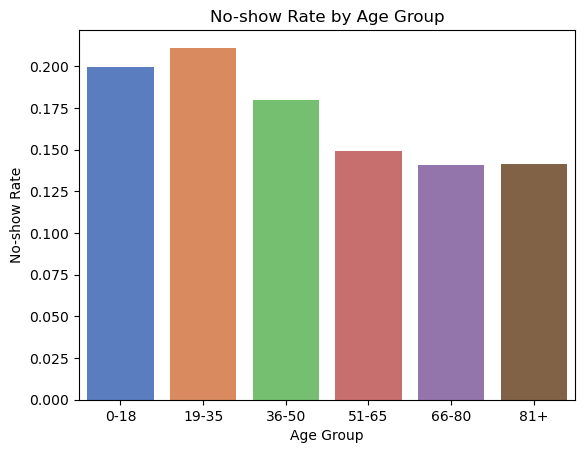

In [20]:
# BarPlot
sns.barplot(x='AgeGroup', y='No-show', data=age_trend, palette='muted')
plt.title('No-show Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('No-show Rate')
plt.show()

In [21]:
# Weekday is already extracted (0 = Monday, 6 = Sunday)
weekday_trend = df.groupby('Weekday')['No-show'].mean().reset_index()

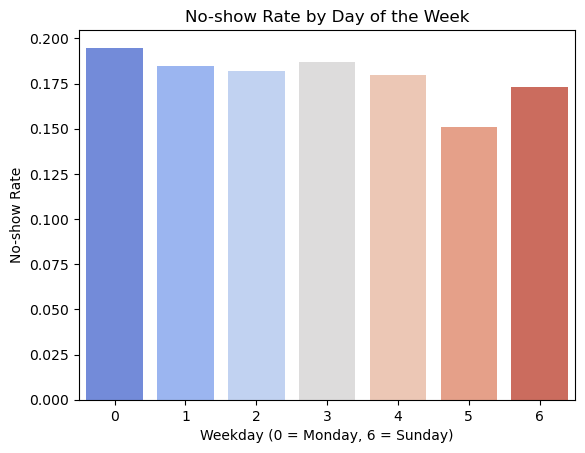

In [22]:
# BarPlot
sns.barplot(x='Weekday', y='No-show', data=weekday_trend, palette='coolwarm')
plt.title('No-show Rate by Day of the Week')
plt.xlabel('Weekday (0 = Monday, 6 = Sunday)')
plt.ylabel('No-show Rate')
plt.show()

In [23]:
# Drop unnecessary columns
df_model = df.drop(columns=['PatientId', 'AppointmentID','Neighbourhood','ScheduledDay','AppointmentDay','AgeGroup'])

In [24]:
df_model

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,DaysBetween,Weekday
0,Female,62,0,1,0,0,0,0,0,0,4
1,Male,56,0,0,0,0,0,0,0,0,4
2,Female,62,0,0,0,0,0,0,0,0,4
3,Female,8,0,0,0,0,0,0,0,0,4
4,Female,56,0,1,1,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
110522,Female,56,0,0,0,0,0,1,0,123,2
110523,Female,51,0,0,0,0,0,1,0,123,2
110524,Female,21,0,0,0,0,0,1,0,70,2
110525,Female,38,0,0,0,0,0,1,0,70,2


In [25]:
# Encode categorical variable (Gender)
df_model['Gender'] = df_model['Gender'].map({'Female': 0, 'Male': 1})

In [26]:
df_model.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,DaysBetween,Weekday
0,0,62,0,1,0,0,0,0,0,0,4
1,1,56,0,0,0,0,0,0,0,0,4
2,0,62,0,0,0,0,0,0,0,0,4
3,0,8,0,0,0,0,0,0,0,0,4
4,0,56,0,1,1,0,0,0,0,0,4


In [27]:
# Define Features and Target
x = df_model.drop(columns='No-show')
y = df_model['No-show']

In [28]:
# Split Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [29]:
# Train Decision Tree Model
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [30]:
# Step 8: Predict and Evaluate
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
# Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     20903
           1       0.78      0.00      0.00      4579

    accuracy                           0.82     25482
   macro avg       0.80      0.50      0.45     25482
weighted avg       0.81      0.82      0.74     25482



In [32]:
# Confusion Matrix
print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))


--- Confusion Matrix ---
[[20901     2]
 [ 4572     7]]


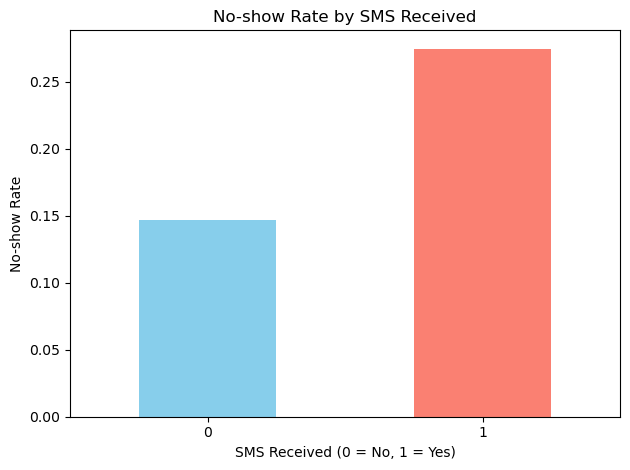

In [33]:
# Visualize SMS Effect
sms_effect = df.groupby('SMS_received')['No-show'].mean()
sms_effect.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('No-show Rate by SMS Received')
plt.xlabel('SMS Received (0 = No, 1 = Yes)')
plt.ylabel('No-show Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [34]:
# Converting numerical to categorical before downloading the cleaned csv file
df.loc[:, 'Weekday'] = df['Weekday'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
df.loc[:, 'Handicap'] = df['Handicap'].map({0: 'None', 1: 'Mild', 2: 'Moderate', 3: 'Severe', 4: 'Very Severe'})

In [35]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,DaysBetween,Weekday,AgeGroup
0,29872500000000,5642903,Female,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,None,0,0,0,Friday,51-65
1,558998000000000,5642503,Male,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,None,0,0,0,Friday,51-65
2,4262960000000,5642549,Female,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,None,0,0,0,Friday,51-65
3,867951000000,5642828,Female,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,None,0,0,0,Friday,0-18
4,8841190000000,5642494,Female,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,None,0,0,0,Friday,51-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572130000000,5651768,Female,2016-03-05,2016-07-06,56,MARIA ORTIZ,0,0,0,0,None,1,0,123,Wednesday,51-65
110523,3596270000000,5650093,Female,2016-03-05,2016-07-06,51,MARIA ORTIZ,0,0,0,0,None,1,0,123,Wednesday,51-65
110524,15576600000000,5630692,Female,2016-04-27,2016-07-06,21,MARIA ORTIZ,0,0,0,0,None,1,0,70,Wednesday,19-35
110525,92134900000000,5630323,Female,2016-04-27,2016-07-06,38,MARIA ORTIZ,0,0,0,0,None,1,0,70,Wednesday,36-50


In [36]:
# Save cleaned version to create dashboards in powerbi
df.to_csv('Appointments_cleaned.csv', index=False)